#**Week 6 - PCA + SVM**

For this week, we'll start by introducing another new way for us to evaluate models. Let's take a look at the diagram below.

------------------------

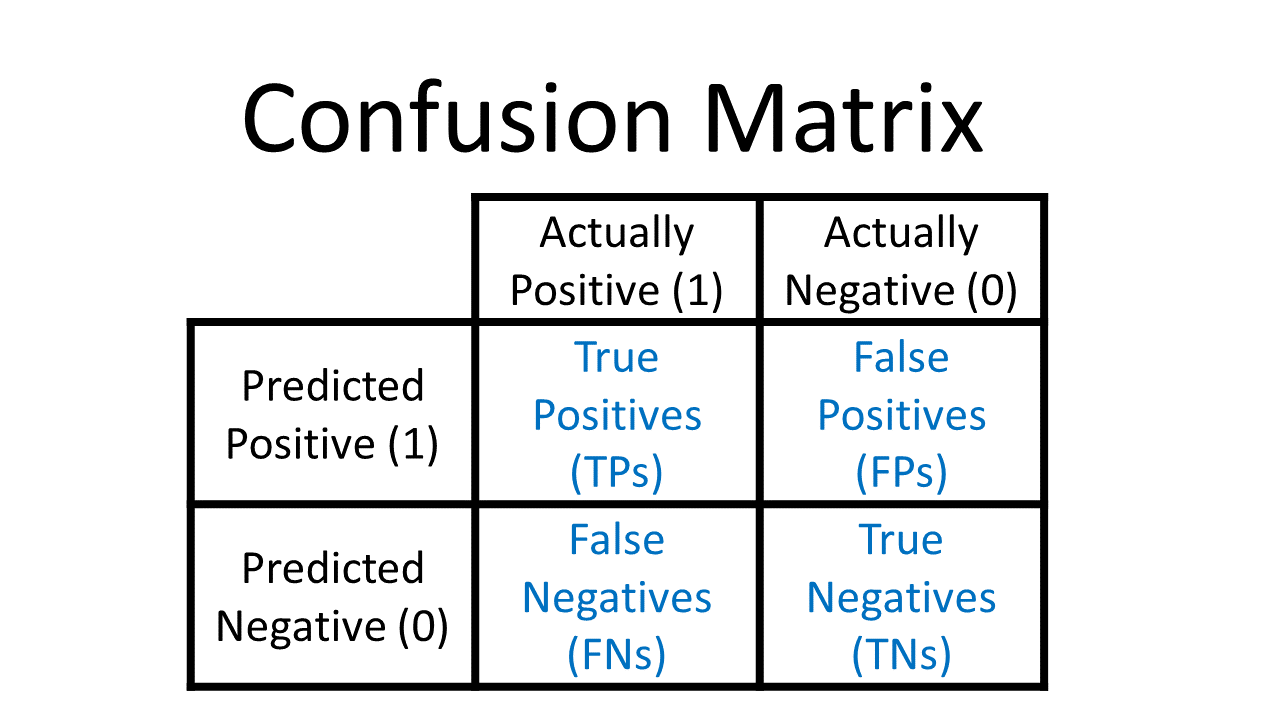

For classification models, we can separate the outcome of each into one of the four categories: TP, FP, FN, TN. These represent the outcome for our model prediction compared to the actual values. This is important for us to compute the the precision and the recall, which can be written as the following: $$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$

But what do these values actually mean? You are free to interpret them however you'd like, but this is how I view precision: it's the amount of positive predictions that are correct out of all the ones that were marked as positive. In our model from last week, you can imagine it to be the percentage of people who ACTUALLY have heart disease when the model says they do, or how right the model is when it makes a bold claim on marking someone down as positive.

Recall represents the percentage of people who were essentially "spotted" from the sample: False Negatives are individuals who were falsely marked as negative by our model when they were actually positive, so in this case, it means people who have heart disease but were not marked down. You can imagine this to be like a detection ratio.

Finally, the value that you are likely most familiar with is accuracy: 

$$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$


Essentially, the correct predictions from the model out of all the values total.

Finally, the last value we care about is called the $F_1$ score. It might be hard to determine which is better, but this value gives us the balance by looking at the harmonic mean (the reciprocal of the average of the reciprocals) between the precision and recall. We use the harmonic mean over the arithmetic mean to punish extreme values more, which means that a high $F_1$ score will lead to a high precision AND recall. This is represented as:

$$F_1 = \frac{2PR}{P + R} = \frac{TP}{TP + \frac{1}{2}(FP + FN)} $$
Where $P$ is the Precision, $R$ is the Recall.

----------------------------

Let's take a look at this in our code. Below is what we did last week.

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

url = 'https://github.com/millenopan/Cardiovascular-Health-Project/blob/main/processed-cleveland.csv?raw=true'
hd = pd.read_csv(url)
hd.target = hd.target.replace({2:1, 3:1, 4:1})
url = 'https://github.com/millenopan/Cardiovascular-Health-Project/blob/main/heart-failure.csv?raw=true'
hf = pd.read_csv(url)

In [3]:
X = hd.drop(['target'], axis = 1)
y = hd.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=85)
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
lr.score(X_test,y_test)

0.819672131147541

We'll be using sklearn's built in metrics to see it evaluate our model.

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve, classification_report

In [5]:
lr_conf_matrix = confusion_matrix(y_test, lr_pred_test)
lr_acc_score = accuracy_score(y_test, lr_pred_test)
print("Confusion Matrix: ")
print(lr_conf_matrix)
print()
print()
print("Accuracy of Logistic Regression: ", lr_acc_score)
print()
print(classification_report(y_test,lr_pred_test))

Confusion Matrix: 
[[23  5]
 [ 6 27]]


Accuracy of Logistic Regression:  0.819672131147541

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



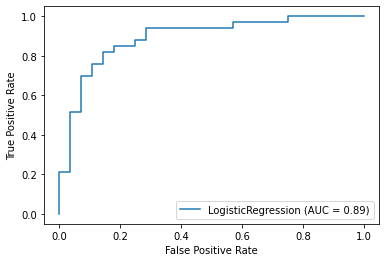

In [6]:
plot_roc_curve(lr, X_test, y_test)
plt.show()

Support is the total count for that value. You can look into macro avg and weighted avg on your own, but for now we'll move on to PCA.

------------------------

The big idea behind Principle Component Analysis is that we often have variables that don't seem to contribute as much as others in terms of improving our model or being related to our data, so we want to reduce it down to fewer things for it to be easier to work with. Suppose we were to plot out the data points on a graph, with multi dimensional axis labeled based on the features given. So if we had 3 independent variables, we would plot out the points in a 3-D space, and color code them based on the category they belong to. In our simple example, this would only be 2 colors to represent 0 or 1.

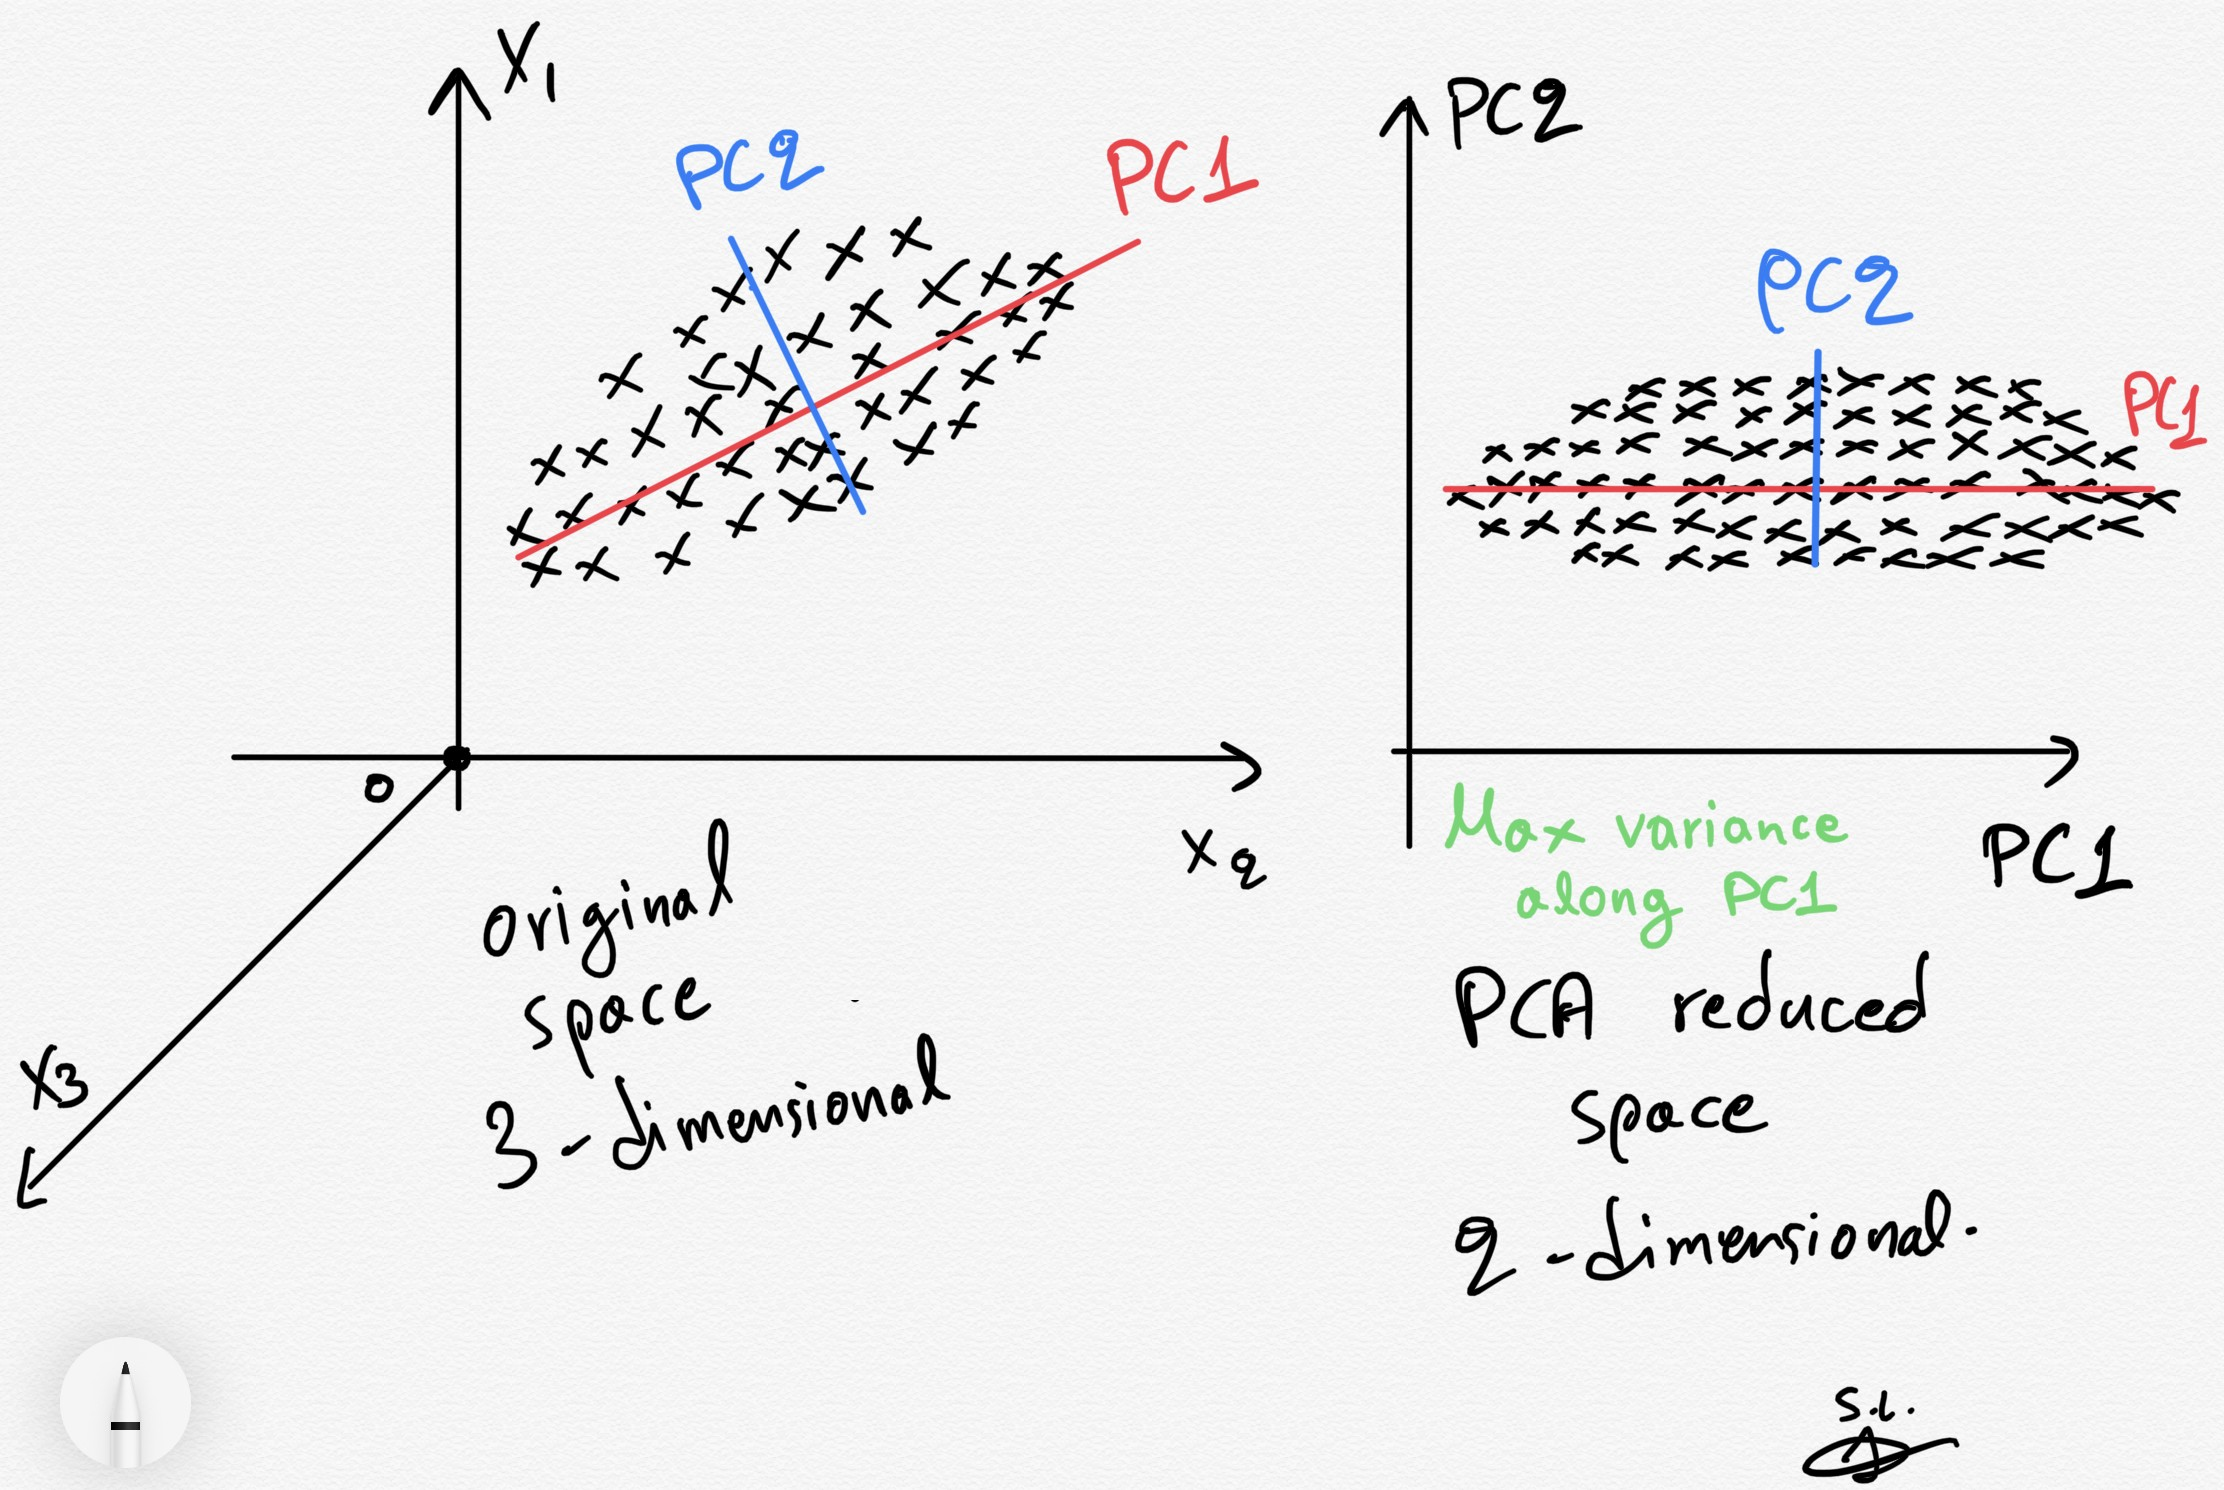

The diagram above provides a good example of how the reduction might look like, although the points themselves aren't labeled. Our new graph with lower dimension will have the axes under PC1, PC2, etc., which mean Principle Component 1, 2, etc. based on how important they are as a factor in relevance to our data.

Again, why should we use PCA? The biggest thing we can see here is that it can reduce our data to a simpler visualization, which makes it less complex and easier to understand as a whole for relationships. Having less variables can also save us computation time when we are creating models, where we have less factors to try and balance in our results, some of which could even end up giving us an overfitted model.

We won't be going too heavy on the theory and calculations behind PCA, but in terms of how it is actually done, all we are doing is applying a change of basis, which is from using linear algebra. In order to construct the ranking for priority of features to label as PC1, PC2, etc. We use SVD: Singular Value Decomposition.

----------------------

So where do Support Vector Machines come into play? The idea behind this method of classification is that we want to draw hyperplanes to split the data perfectly. Visually, if you are thinking in 2-D space, it would just be a line, and in 3-D, it would be a plane. The splitting hyperplane is always one less than the total number of dimensions we have on hand.

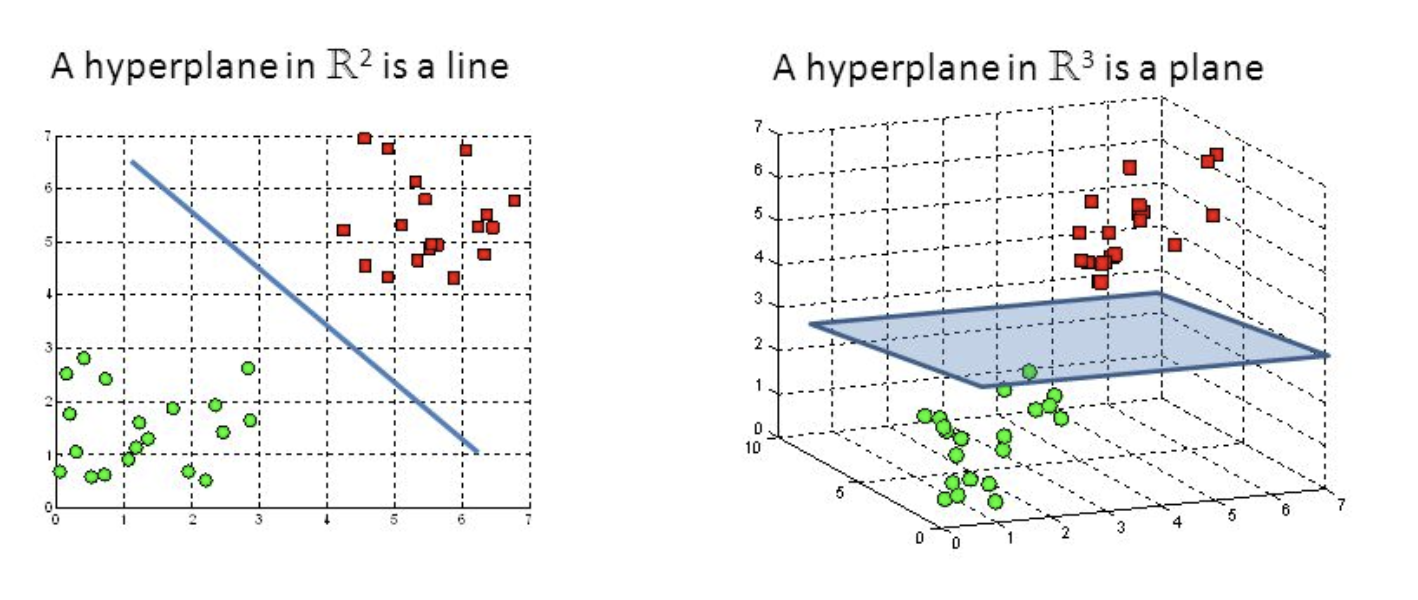

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Let's apply SVC (Support Vector Classification) as a model and see what happens!

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=85)
svc = SVC()
svc.fit(X_train, y_train)
svc_pred_train = svc.predict(X_train)
svc_pred_test = svc.predict(X_test)

svc_conf_matrix = confusion_matrix(y_test, svc_pred_test)
svc_acc_score = accuracy_score(y_test, svc_pred_test)
print("Confusion Matrix: ")
print(svc_conf_matrix)
print()
print()
print("Accuracy of Logistic Regression: ", svc_acc_score)
print()
print(classification_report(y_test,svc_pred_test))

Confusion Matrix: 
[[23  5]
 [20 13]]


Accuracy of Logistic Regression:  0.5901639344262295

              precision    recall  f1-score   support

           0       0.53      0.82      0.65        28
           1       0.72      0.39      0.51        33

    accuracy                           0.59        61
   macro avg       0.63      0.61      0.58        61
weighted avg       0.64      0.59      0.57        61



Hmm... that seems pretty bad! It's important to note that some models just do worse than others, but let's see if we can improve this using PCA.

One last thing: we are also using StandardScaler for this walkthrough: This normalizes our features so that the mean is zero with unit variance. Essentially, we center up the features in numeric value since many models prefer training on this instead (such as SVC), and if it doesn't resemble looking normal it might struggle to generate a good model.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=85)

#scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#apply PCA to only keep 4 components
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#how much of the total variance can be represented with just these components? (In order of importance)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.23941867, 0.12764591, 0.09902736, 0.08024959])

In [ ]:
svcpca = SVC()
svcpca.fit(X_train, y_train)
svcpca_pred_train = svcpca.predict(X_train)
svcpca_pred_test = svcpca.predict(X_test)

svcpca_conf_matrix = confusion_matrix(y_test, svcpca_pred_test)
svcpca_acc_score = accuracy_score(y_test, svcpca_pred_test)
print("Confusion Matrix: ")
print(svcpca_conf_matrix)
print()
print()
print("Accuracy of Logistic Regression: ", svcpca_acc_score)
print()
print(classification_report(y_test,svcpca_pred_test))

Confusion Matrix: 
[[25  3]
 [ 7 26]]


Accuracy of Logistic Regression:  0.8360655737704918

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.90      0.79      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Here, when we only utilize 4 features to construct our model, we managed to create something that does way better. We can also see this for the first few entries:

In [ ]:
print("SVC Results:          ", svc_pred_test[0:19])
print("SVC with PCA Results: ", svcpca_pred_test[0:19])
print()
print("Actual:               ", y_test.values[0:19])

SVC Results:           [0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0]
SVC with PCA Results:  [0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0]

Actual:                [0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0]


It looks like we are definitely doing much better with this! This will conclude new models we are introducing, and showcases some of the most popular models that are used today.